In [13]:
import numpy as np
import pandas as pd

In [14]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 1 through 20
nums = np.arange(1, 21)

nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [15]:
# sample that array 20 times with replacement
np.random.choice(a=nums, size=20, replace=True)
# This is our bootstrapped sample notice it has repeat variables!

array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

In [16]:
# read in the data
url = 'C:/Users/admin/Documents/GitHub/python-ds-book/data/hitters.csv'

hitters = pd.read_csv(url)
# remove rows with missing values
hitters.dropna(inplace=True)

# encode categorical variables as integers
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

# define features: exclude career statistics (which start with "C")
# and the response (Salary)
feature_cols = [h for h in hitters.columns if h[0] != 'C' and h !='Salary']

# define X and y
X = hitters[feature_cols]
y = hitters.Salary

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-pa

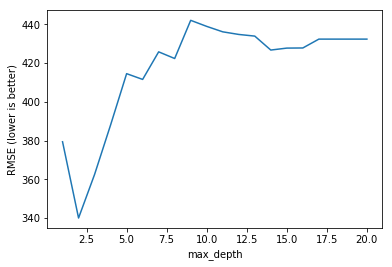

In [18]:
from sklearn.tree import DecisionTreeRegressor

# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth 
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth

from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admin\Anaconda2\lib\site-pa

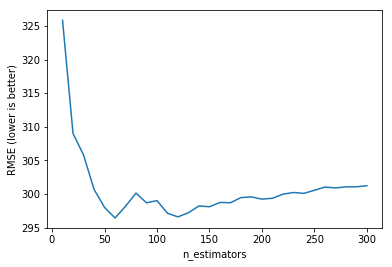

In [19]:
from sklearn.ensemble import RandomForestRegressor

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators
#(WARNING: SLOW!)

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

    # plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# n_estimators=150 is sufficiently good
rfreg = RandomForestRegressor(n_estimators=150, random_state=1)
rfreg.fit(X, y)

# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_})\
.sort('importance', ascending = False)

In [21]:
from sklearn.cross_validation import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

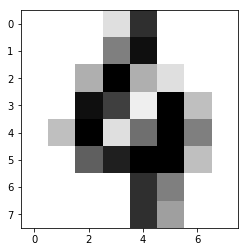

In [22]:
digits = datasets.load_digits()
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')

In [23]:
X, y = digits.data, digits.target
# 64 pixels per image

X[0].shape

# Try Random Forest
rfclf = RandomForestClassifier(n_estimators=100, random_state=1)
cross_val_score(rfclf, X, y, cv=5, scoring='accuracy').mean()

0.93827825631112682

In [25]:
from pybrain.datasets import ClassificationDataSet
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from numpy import ravel

In [26]:
# pybrain has its own data sample class that we must add
# our training and test set to
ds = ClassificationDataSet(64, 1 , nb_classes=10)
for k in xrange(len(X)):
    ds.addSample(ravel(X[k]),y[k])

    # their equivalent of train test split
test_data, training_data = ds.splitWithProportion( 0.25 )

In [27]:
# pybrain's version of dummy variables
test_data._convertToOneOfMany( )
training_data._convertToOneOfMany( )

print test_data.indim # number of pixels going in
print test_data.outdim # number of possible options (10 digits)

64
10


In [29]:
# instantiate the model with 64 hidden layers (standard params)
fnn = buildNetwork( training_data.indim, 64, training_data.outdim\
                   ,outclass=SoftmaxLayer )
trainer = BackpropTrainer( fnn, dataset=training_data, momentum=0.1\
                          ,learningrate=0.01 , verbose=True, weightdecay=0.01)

# change the number of epochs to try to get better results!
trainer.trainEpochs (10) # 10 batches

print 'Percent Error on Test dataset: ', \
percentError( trainer.testOnClassData (dataset=test_data), test_data['class'] )

accuracy = 1 - .0645879732739
accuracy

Total error: 0.0402114717196
Total error: 0.0202456571302
Total error: 0.013494269113
Total error: 0.010177974584
Total error: 0.00834507216673
Total error: 0.006846926105
Total error: 0.00561325494703
Total error: 0.0052328547574
Total error: 0.00457024017162
Total error: 0.00393585293721
Percent Error on Test dataset:  6.68151447661


0.9354120267261